#**Desafio Challenge Probabilidade e Amostragem.**

##**Desafio 1: Entendendo o consumidor.**



Suponha que você trabalha em uma empresa de produtos de beleza populares e, com
a pandemia, você suspeita que o perfil de seus clientes mudou. 
O time de marketing, pediu a sua ajuda e gostaria de entender se:
1. isso de fato aconteceu e 
2. quais as diferenças do novo perfil de clientes para o antigo, pois assim poderiam personalizar melhor os seus anúncios. 
Para isso, eles te enviaram a base de dados(desafio_01_consumidor.csv). 
Como você poderia ajudá-los?

Para responder esse desafio:

A base de dados: desafio_01_consumidor.csv contém informações de seus clientes
(anonimizados) no período pré e pós pandemia. A coluna "pré-pandemia" indica se o dado é pré-pandemia ou não, sendo 1, caso positivo ou 0 caso negativo.
Dica / Passo a Passo:
1. Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia

  a. Identifique as distribuições

  b. Plote histogramas / boxplots

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)
3. Suponha agora que os dados recebidos são somente uma amostra da sua
população total de clientes. Suponha que a sua "população" de clientes
verdadeira é de 100000. Qual o tamanho da amostra necessária para
chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A
base informada é suficiente? E com uma margem de erro de 10%?

**Importando Bibliotecas**



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Leitura dos dados**

In [2]:
df = pd.read_csv('desafio01consumidor-230209-165113.csv')

**Visualizando os Dados**

In [3]:
df.head()

,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


**Verificando o tamanho do Dataset**

In [4]:
df.shape

(203, 6)

**Verificando as informações dos tipos de Dados**

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_cliente    203 non-null    object
 1   idade         203 non-null    int64 
 2   renda         203 non-null    int64 
 3   produto       203 non-null    object
 4   regiao-BR     203 non-null    object
 5   pre-pandemia  203 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.6+ KB


**Estatisticas Descritivas**

In [7]:
df.describe().round(2)

,idade,renda,pre-pandemia
count,203.0,203.00,203.0
mean,42.4,11586.36,0.5
std,14.4,6288.02,0.5
min,15.0,110.00,0.0
25%,31.0,6705.00,0.0
50%,41.0,11145.00,0.0
75%,53.0,15590.50,1.0
max,80.0,30000.00,1.0


1. Entenda a distribuição de variáveis como de idade / renda / regiao /produtos mais comprados antes e depois da pandemia

  a. Identifique as distribuições
  
  b. Plote histogramas / boxplots

In [8]:
dist = df[['idade', 'renda', 'regiao-BR', 'produto']].value_counts()
dist

idade  renda  regiao-BR     produto    
15     9910   Sudeste       batom          1
49     8201   Nordeste      sombra         1
47     13743  Norte         antissinais    1
       15827  Centro-Oeste  antissinais    1
       22927  Norte         antissinais    1
                                          ..
36     11100  Nordeste      desodorante    1
       11713  Nordeste      sombra         1
       12755  Sul           desodorante    1
       14108  Nordeste      desodorante    1
80     15969  Centro-Oeste  sombra         1
Length: 203, dtype: int64

In [9]:
df[df['pre-pandemia'] == 1].value_counts().sort_values(ascending=False).round(4)

id_cliente  idade  renda  produto      regiao-BR  pre-pandemia
XXXXXXX10   42     6891   batom        Sul        1               1
XXXXXXX47   36     19226  batom        Nordeste   1               1
XXXXXXX13   34     3118   desodorante  Nordeste   1               1
XXXXXXX14   24     7996   batom        Sudeste    1               1
            26     13770  batom        Sudeste    1               1
                                                                 ..
XXXXXXX98   24     1142   batom        Sudeste    1               1
            47     22927  antissinais  Norte      1               1
XXXXXXX99   27     5409   batom        Sul        1               1
            53     18104  batom        Sul        1               1
            55     18864  batom        Sul        1               1
Length: 101, dtype: int64

In [10]:
df[df['pre-pandemia'] == 1].min()

id_cliente         XXXXXXX10
idade                     16
renda                    110
produto          antissinais
regiao-BR       Centro-Oeste
pre-pandemia               1
dtype: object

In [11]:
df[df['pre-pandemia'] == 1].max()

id_cliente      XXXXXXX99
idade                  80
renda               24090
produto            sombra
regiao-BR             Sul
pre-pandemia            1
dtype: object

In [12]:
df[df['pre-pandemia'] == 0].value_counts().sort_values(ascending=False).round(4)

id_cliente  idade  renda  produto      regiao-BR  pre-pandemia
XXXXXXX10   46     7521   antissinais  Norte      0               1
XXXXXXX21   36     17837  desodorante  Sul        0               1
XXXXXXX14   62     10964  desodorante  Sul        0               1
XXXXXXX17   31     11180  desodorante  Sul        0               1
            36     12755  desodorante  Sul        0               1
                                                                 ..
XXXXXXX92   58     15278  desodorante  Sul        0               1
XXXXXXX93   43     11007  desodorante  Sudeste    0               1
XXXXXXX94   54     12025  desodorante  Sul        0               1
XXXXXXX99   33     17969  sombra       Nordeste   0               1
            37     12617  desodorante  Sul        0               1
Length: 102, dtype: int64

In [13]:
df[df['pre-pandemia'] == 0].min()

id_cliente         XXXXXXX10
idade                     15
renda                   1995
produto          antissinais
regiao-BR       Centro-Oeste
pre-pandemia               0
dtype: object

In [14]:
df[df['pre-pandemia'] == 0].max()

id_cliente      XXXXXXX99
idade                  77
renda               30000
produto            sombra
regiao-BR             Sul
pre-pandemia            0
dtype: object

b. Plote histogramas / boxplots

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'renda'}>],
       [<Axes: title={'center': 'pre-pandemia'}>, <Axes: >]], dtype=object)

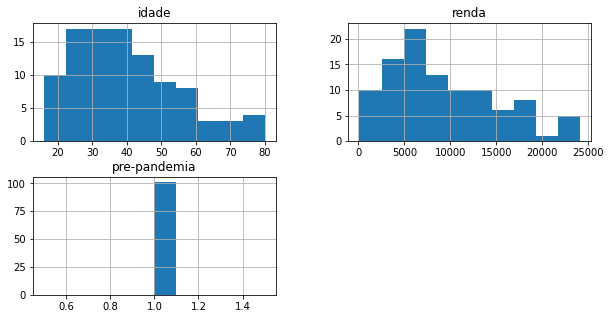

In [15]:
df[df['pre-pandemia'] == 1].hist(bins = 10, figsize=(10,5))

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'renda'}>],
       [<Axes: title={'center': 'pre-pandemia'}>, <Axes: >]], dtype=object)

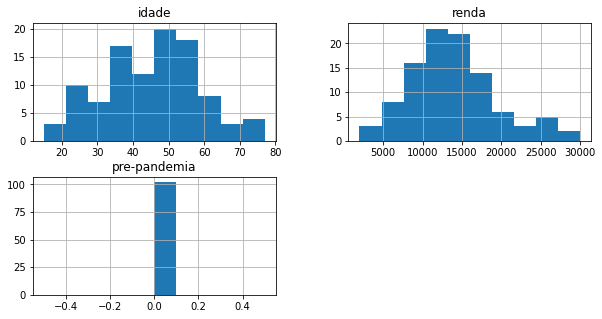

In [16]:
df[df['pre-pandemia'] == 0].hist(bins = 10, figsize=(10,5))

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'renda'}>],
       [<Axes: title={'center': 'pre-pandemia'}>, <Axes: >]], dtype=object)

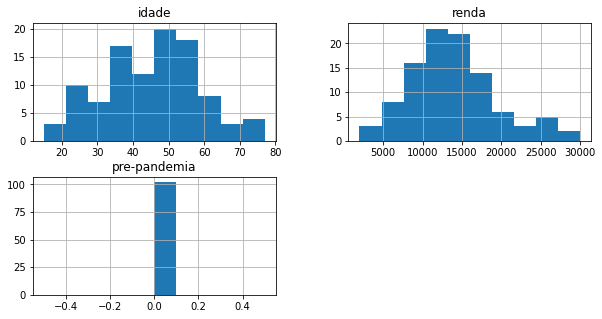

In [17]:
df[df['pre-pandemia'] == 0].hist(bins = 10, figsize=(10,5))

<Axes: title={'center': 'Distribuição das vendas por idade'}, xlabel='produtos', ylabel='pre-pandemia'>

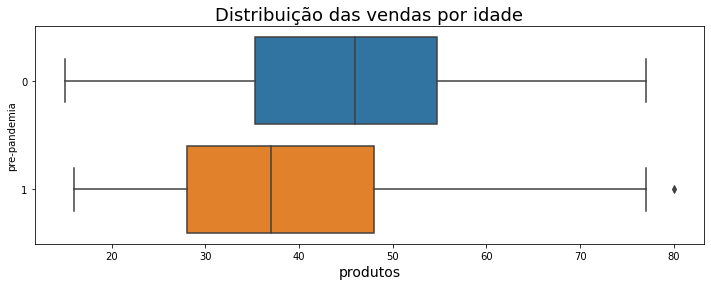

In [18]:
ax = sns.boxplot(x = 'idade', y = 'pre-pandemia', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Distribuição das vendas por idade', fontsize=18)
ax.set_xlabel('produtos', fontsize=14)
ax

<Axes: title={'center': 'Distribuição da Renda das clientes'}, xlabel='Reais (R$)'>

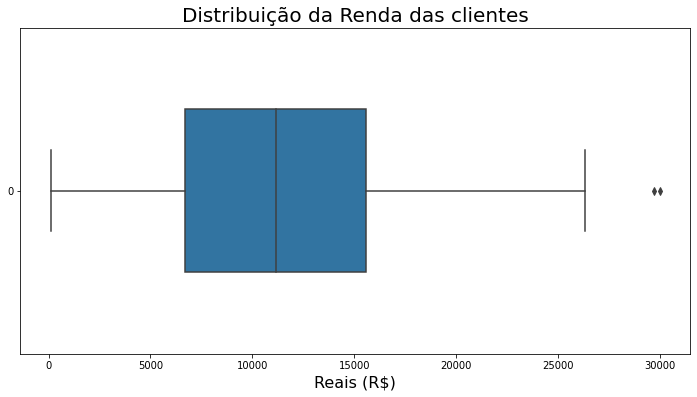

In [19]:
ax = sns.boxplot(data=df.renda, orient='h', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição da Renda das clientes', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

2. Você notou diferenças nítidas pré e pós pandemia? Como você poderia provar estatisticamente que essas diferenças são significativas ? (pergunta extra)

In [20]:
df[df['pre-pandemia'] == 1].mean()

<ipython-input-20-dbc8354e95cd>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['pre-pandemia'] == 1].mean()


idade             39.881188
renda           9180.643564
pre-pandemia       1.000000
dtype: float64

In [21]:
df[df['pre-pandemia'] == 0].mean()

<ipython-input-21-54b28ece4506>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['pre-pandemia'] == 0].mean()


idade              44.901961
renda           13968.500000
pre-pandemia        0.000000
dtype: float64

**Aplicar o Teste de normalidade - normaltest**

In [22]:
from scipy.stats import normaltest

In [23]:
normaltest(df['pre-pandemia'])

NormaltestResult(statistic=1087.6907447044205, pvalue=6.470767250750225e-237)

In [24]:
significancia = 0.02

**Critério do valor**

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

In [25]:
stat_test, p_valor = normaltest(df['pre-pandemia'])
print(stat_test)
print(p_valor)

1087.6907447044205
6.470767250750225e-237


In [26]:
p_valor <= significancia

True

**O p_valor é (>)maior (p≤0,05), portanto não devemos rejeitar $H_0$, trata-se de uma distribuição normal.**

3. Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [27]:
from scipy.stats import norm

In [28]:
N = 100000
N

100000

In [29]:
confianca = 0.95
confianca

0.95

In [30]:
e = 0.02
e

0.02

In [31]:
erro_percentual = 0.10
erro_percentual

0.1

### Tamanho da amostra ($1 - \alpha = 95\%$)

In [32]:
0.5 + (0.95 / 2)

0.975

In [33]:
z = norm.ppf(0.975)
z

1.959963984540054

##**Desafio 2: Determinando o Estoque de Segurança.**

Suponha agora que você trabalha em uma empresa de produtos perecíveis, como
Danone ou Nestlé. Para a empresa, é muito importante que a sua política de estoque seja eficiente. É necessário manter um estoque de segurança em todos os produtos(acima da previsão de vendas), pois, caso contrário, as pessoas podem não encontrar os produtos no supermercado. Mas, ao mesmo tempo, se o estoque estiver em excesso, isso pode representar um grande custo. Os produtos podem não ser comprados, e consequentemente, jogados fora, o que na indústria se chama
"desova".

Para achar o equilíbrio perfeito, o gerente de vendas pediu a ajuda a você, do time de análise de dados, e ele gostaria de saber qual o estoque de segurança ideal. Para responder esse desafio, antes vamos abordar alguns conceitos importantes na indústria:

● Estoque de segurança: é uma quantidade de estoques que se tem, mas que
não se deseja usar. É como um seguro do carro: é bom ter um, mas você
não quer precisar usá-lo. Isto porque ele é calculado apenas para suprir
uma segurança em casos de variações inesperadas, algo que você não pode
prever ou controlar: problemas no fornecedor, atrasos na entrega, uma
demanda que não foi prevista…

● Demanda: se a demanda é bem estável e conhecida com antecedência,
então temos pouca variabilidade a cada mês e não precisamos nos proteger
muito contra essas variações (pois sabemos que elas não ocorrem); por
outro lado, se seu produto tem uma variabilidade nas vendas muito grande,
então precisaremos de estoque de segurança maior. Isto tudo é medido
matematicamente através do desvio padrão da demanda, que neste caso é
calculado como o desvio padrão da previsão da demanda. Um bom sistema
de previsões é capaz de oferecer este número, ou ele pode ser estimado de
maneiras mais simples, mas menos precisas.

● Lead time (tempo de entrega) do produto: se o tempo de entrega é elevado
e sua variabilidade é alta (se uma entrega é feita em 5 dias, outra em 8 dias,
outra em 2 dias), então é preciso ter uma segurança frente à este tempo
média de entrega de 5 dias, pois algumas vezes ela chega a demorar 8 dias.
Mas não queremos nos planejar sempre para receber apenas depois de 8
dias, pois isto acarretaria custos muito altos, então o estoque de segurança
utiliza a estatística para auxiliar nessa tarefa.

● Nível de serviço desejado: nem todos os produtos merecem a mesma
atenção e o mesmo cuidado; alguns produtos são críticos, mais importantes
ou mais atrativos, e por isso merecem estar sempre presentes, enquanto
em outros produtos podemos nos dar ao luxo de não tê-lo em estoque
sempre. Matematicamente, isto é modelado através do nível de serviço
desejado: quanto maior o nível de serviço (um número percentual de 0 a
100), maior será o estoque de segurança pois queremos mais garantias que
o produto estará sempre disponível. O nível de serviço depende de cada
setor: palitos de fósforo num supermercado não devem ter nível de serviço
muito alto, enquanto antibióticos numa farmácia hospitalar devem ter nível
de serviço altíssimo. O nível de serviço indica o quanto queremos estar
seguros frente às variabilidades que ocorrem, em outras palavras, frente
aos desvios padrões da demanda e do lead time.

● A Fórmula Mãe do Estoque de segurança:
A maioria das indústrias calcula o estoque de segurança tomando como
base a distribuição normal. Assumindo que suas vendas seguem essa
distribuição, ela irá determinar qual a probabilidade de se vender certo
produto.



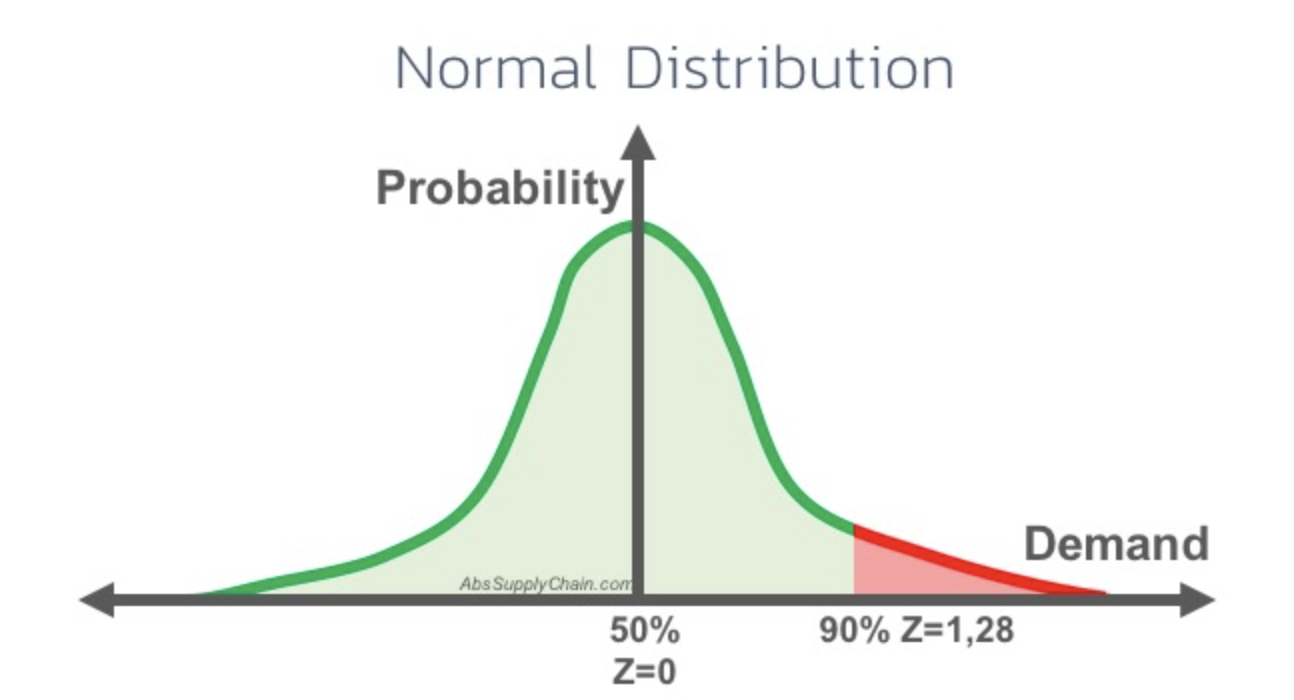

Por exemplo, se você vende na média 1000 unidades de produto por
semana, a distribuição mostra que você tem uma alta probabilidade de
vender em torno de 1000 todas as semanas, e uma baixa probabilidade de
esse número ser 20 ou 200000 de produtos vendidos.

Assim, você pode utilizar a distribuição normal, para entender qual o seu
nível de serviço desejado. Ou seja, se você deseja um nível de serviço de
90%, a curva normal irá te fornecer o multiplicador desejado (variações da
média) para você alcançar 90% da demanda.

Portanto, matematicamente, podemos determinar o estoque de segurança
utilizando os conceitos abordados em estatística, como a tabela da
distribuição normal, utilizando a fórmula abaixo.


Estoque de Segurança =
# $$Z * \sqrt{\sigma^2_dt + \sigma^2_td^2}$$ 


sendo :

z = o valor da tabela da distribuição normal, que indica a quantos desvios
padrões ao redor da média temos que tomar para cobrir a proporção da
área sob a curva normal /nível de serviço desejado.

d = demanda média passada ou estimada

t = lead time médio.

σ = desvio padrão / variação da demanda 𝑑

σ = desvio padrão / variação do lead time 𝑡

Assim se o tempo de entrega tiver pouca variabilidade a fórmula pode ser
aproximada por :



Estoque de Segurança =
# $$Z * \sqrt{\sigma^2_dt}$$ 

e a intuição da fórmula pode ser vista como : O quanto de variação da
média da demanda eu estou disposto a aceitar além do natural (z-score do
nível de serviço) 
* desvio médio da demanda que já ocorre naturalmente 
* tempo de entrega.

Matematicamente o valor obtido pela fórmula deve ser sempre
arredondado para cima, para garantir que estamos cobertos contra
variações indesejadas.

Dados esses conceitos vamos ao passo a passo do desafio.
O gerente de vendas te enviou o arquivo desafio_02_estoque.csv contendo os
dados de vendas de iogurte e o lead time de 2015 a 2022.

1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição
normal? Que características você identificou para chegar a essa conclusão?

2. Assuma que:

  a. Os dados seguem uma distribuição normal.

  b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%

  c. O produto não tem sazonalidade (todos os meses vende valores próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df2 = pd.read_csv('desafio_02_estoque-230209-165113.csv')

In [36]:
df2.head()

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


In [37]:
df2.shape

(370, 3)

In [38]:
df2.describe().round(2)

,vendas-iogurte,lead-time
count,370.00,370.00
mean,4999.17,5.09
std,77.29,1.58
min,4811.00,1.00
25%,4947.00,4.00
50%,4996.00,5.00
75%,5054.00,6.00
max,5233.00,9.00


**1. Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? Que características você identificou para chegar a essa conclusão?**

In [39]:
df2[['vendas-iogurte']].value_counts()

vendas-iogurte
5020              6
4952              5
4932              5
4963              5
4968              5
                 ..
4967              1
4969              1
4970              1
4977              1
5233              1
Length: 207, dtype: int64

In [40]:
df2[['lead-time']].value_counts()

lead-time
5            89
6            79
4            77
7            50
3            37
8            14
2            13
9             6
1             5
dtype: int64

*A função normaltest testa a hipótese nula  H0  de que a amostra é proveniente de uma distribuição normal.*

In [41]:
from scipy.stats import normaltest

In [42]:
normaltest(df2[['vendas-iogurte']])

NormaltestResult(statistic=array([1.85754489]), pvalue=array([0.39503834]))

In [43]:
stat_test, p_valor = normaltest(df2[['vendas-iogurte']])
print(stat_test)
print(p_valor)

[1.85754489]
[0.39503834]


In [44]:
normaltest(df2[['lead-time']])

NormaltestResult(statistic=array([0.32506746]), pvalue=array([0.84998742]))

In [45]:
stat_test, p_valor = normaltest(df2[['lead-time']])
print(stat_test)
print(p_valor)

[0.32506746]
[0.84998742]


In [46]:
p_valor <= significancia

array([False])

**Critério do valor**

> ### Rejeitar $H_0$ se o valor $p\leq 0,05$

**O p_valor é (>)maior (p≤0,05), portanto não devemos rejeitar $H_0$, trata-se de uma distribuição normal.**

2. Assuma que:

  a. Os dados seguem uma distribuição normal.

  b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%

  c. O produto não tem sazonalidade (todos os meses vende valores próximos) e a demanda média passada é uma boa estimativa para a projetada, de acordo com o time de planejamento de demanda.

Calcule, com os dados fornecidos, o estoque de segurança desejado.

In [47]:
d = 4999.17
t = 5.09
σ = 5972.98
σ = 2.49
z = norm.ppf(0.995)

In [48]:
sazonalidade = norm.ppf(0.995)*np.sqrt(σ**2/d*t).round(4)
sazonalidade

0.20477842963213758

In [49]:
estoq_seg = z*np.sqrt((σ**2/d)*t + (σ**2/t)*(d**2))
estoq_seg

14212.007925908823